# Pre-Processing and Training Data Development

#### Create dummy or indicator features for categorical variables
- In the context of this problem, would you try to create dummy variables using the continents?
- Would turning nummerical values into catagorical values help or hurt in the context of this project? For example:
    - Internet percent could be turned into bins of: 0% - 24%, 25% - 49%, 50% - 74%, 75% - 100%.
    - Population could be turned into bins of: 0-499k, 500-999k, 1000-1499k, 1500-2000k, etc.
    - GDP could be broken into similar bins.
   




#### Standardize the magnitude of numeric features using a scaler
- Electricity_consumed is currently in billion kilowatt hours, should that be changed to simple kilowatt hours for effective scaling?
- GDP is currently in the billions, does that need to be converted for effective scaling?
- Population is currently in thousands, does this need to be converted to raw population counts for effective scaling?



#### Split your data into testing and training datasets

In [4]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as plt

import warnings # For handling error messages.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [5]:
file = 'final_df.csv'
df = pd.read_csv(file, index_col=[0,1])
df.head(100)

int_perc  electricity_consumed  population       GDP continent  \
Country Date                                                                    
AFG     1990   0.000000              1.021140    12412.30   33.5173      Asia   
        1991   0.000000              1.044770    13299.00   30.4497      Asia   
        1992   0.000000              0.768050    14485.50   30.0136      Asia   
        1993   0.000000              0.729610    15816.60   24.2715      Asia   
        1994   0.000000              0.750170    17075.70   18.6874      Asia   
        1995   0.000000              0.685440    18110.70   24.3930      Asia   
        1996   0.000000              0.620570    18853.40   25.2627      Asia   
        1997   0.000000              0.564070    19357.10   23.9564      Asia   
        1998   0.000000              0.527800    19737.80   22.8357      Asia   
        1999   0.000000              0.523150    20170.80   21.7440      Asia   
        2000   0.000000              0.534310    20780.00   20.5799      Asia   
        2001   0.004723              0.650560    21607.00   19.4201      Asia   
        2002   0.004561              0.738910    22600.80   28.8519      Asia   
        2003   0.087891              0.973270    23680.90   33.4125      Asia   
        2004   0.105809              0.931420    24726.70   34.3682      Asia   
        2005   1.224148              0.973620    25654.30   36.9487      Asia   
        2006   2.107124              1.210410    26433.10   40.1128      Asia   
        2007   1.900000              1.488780    27100.50   49.1955      Asia   
        2008   1.840000              1.429049    27722.30   48.6518      Asia   
        2009   3.550000              2.027433    28394.80   53.9395      Asia   
        2010   4.000000              2.442759    29185.50   56.7712      Asia   
        2011   5.000000              3.033989    30117.40   60.6103      Asia   
        2012   5.454545              3.919160    31161.40   66.4914      Asia   
        2013   5.900000              4.640790    32269.60   70.9136      Asia   
        2014   6.390000              4.783220    33370.80   73.0931      Asia   
ALB     1990   0.000000              1.659000     3286.07   15.5809    Europe   
        1991   0.000000              1.715000     3280.40   11.2179    Europe   
        1992   0.000000              1.443000     3245.89   10.4103    Europe   
        1993   0.000000              1.727000     3195.20   11.4097    Europe   
        1994   0.000000              2.017000     3146.52   12.3567    Europe   
        1995   0.011169              2.152000     3112.92   14.0002    Europe   
        1996   0.032197              2.790000     3098.70   15.2744    Europe   
        1997   0.048594              2.084000     3099.75   13.6190    Europe   
        1998   0.065027              2.200000     3110.70   14.8459    Europe   
        1999   0.081437              3.482000     3122.70   16.8503    Europe   
        2000   0.114097              3.758360     3129.25   17.9666    Europe   
        2001   0.325798              3.548780     3129.70   19.3931    Europe   
        2002   0.390081              4.545560     3126.18   20.2137    Europe   
        2003   0.971900              4.110580     3118.02   21.3740    Europe   
        2004   2.420388              3.777600     3104.89   22.5866    Europe   
        2005   6.043891              3.738800     3086.81   23.8874    Europe   
        2006   9.609991              2.991420     3063.02   25.1848    Europe   
        2007  15.036115              3.693680     3033.99   26.6720    Europe   
        2008  23.860000              4.053000     3002.68   28.6821    Europe   
        2009  41.200000              4.302000     2973.04   29.6441    Europe   
        2010  45.000000              4.424770     2948.03   30.7430    Europe   
        2011  49.000000              5.141940     2928.60   31.5255    Europe   
        2012  54.655959              4.322650 

### Scaling 'int_perc'

Which type of scaling should we use?


In [18]:
usa = df.loc['USA']
usa

,int_perc,electricity_consumed,population,GDP,continent,country_name
Date,,,,,,
1990,0.784729,2837.116986,249516.8,9798.60,North America,United States of America
1991,1.163194,2886.097489,252831.2,9787.97,North America,United States of America
1992,1.724203,2897.247672,256391.2,10132.74,North America,United States of America
1993,2.271673,3000.745154,259809.5,10411.67,North America,United States of America
1994,4.862781,3080.938525,263017.8,10831.18,North America,United States of America
1995,9.237088,3164.020666,266179.2,11121.90,North America,United States of America
1996,16.419353,3253.831146,269310.5,11541.47,North America,United States of America
1997,21.616401,3301.923343,272559.2,12054.74,North America,United States of America
1998,30.093197,3425.180366,275762.2,12594.97,North America,United States of America


<AxesSubplot:>

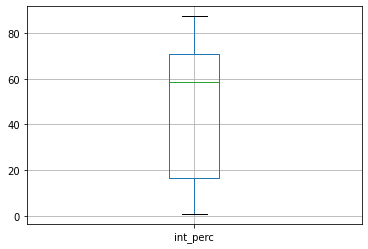

In [43]:
usa[['int_perc']].boxplot()

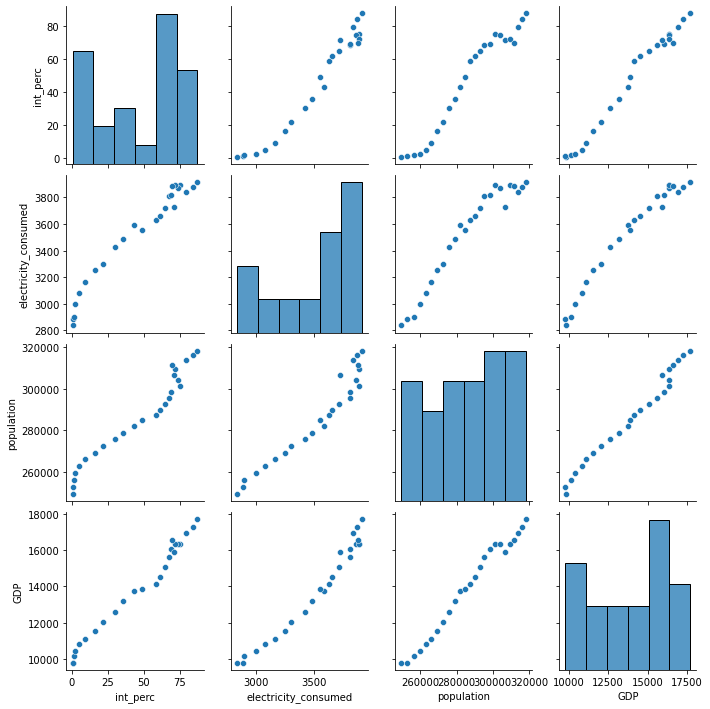

In [47]:
sns.pairplot(usa)